In [1]:
%pylab inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import EarlyStopping
from keras.applications import (VGG16, InceptionV3, ResNet50, VGG19, Xception, InceptionResNetV2, DenseNet201, 
NASNetMobile, NASNetLarge, MobileNet)


import sys


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
model_flag = 1
pool = None

if model_flag == 1:
    vgg_conv = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling=pool)
    vgg_conv.summary()
elif model_flag == 2:
    inc_conv = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3),
                      pooling=pool)
elif model_flag == 3:
    resnet_conv = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3),
                      pooling=pool)
elif model_flag == 4:
    vgg19_conv = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3),
                      pooling=pool)
elif model_flag == 5:
    xcep_conv = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(299,299,3),
                      pooling=pool)
elif model_flag == 6:
    inc_res_conv = InceptionResNetV2(weights='imagenet',
                      include_top=False,
                      input_shape=(299,299,3),
                      pooling=pool)
elif model_flag == 7:
    dense201_conv = DenseNet201(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3),
                      pooling=pool)
elif model_flag == 8:
    nasnet_conv = NASNetMobile(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3),
                      pooling=pool)
elif model_flag == 9:
    nasnet_conv = NASNetLarge(weights='imagenet',
                  include_top=False,
                  input_shape=(331, 331, 3),
                      pooling=pool)
elif model_flag == 10:
    mobilenet_conv = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3),
                      pooling=pool)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
train_dir = '/home/rlee/Documents/Pneumothorax/model/mmode/train'
validation_dir = '/home/rlee/Documents/Pneumothorax/model/mmode/val'

nTrain = 1829
nVal = 457

if model_flag == 5 or model_flag == 6:
    datagen = ImageDataGenerator(rescale=1./255,data_format="channels_last")
    target_sz = 299
elif model_flag == 9:
    datagen = ImageDataGenerator(rescale=1./255)
    target_sz = 331
else:
    datagen = ImageDataGenerator(rescale=1./255)
    target_sz = 224

batch_size = 32

if model_flag == 1:
    d1 = 7
    d2 = 7
    d3 = 512
    model_name = 'VGG16'
elif model_flag == 2:
    d1 = 5
    d2 = 5
    d3 = 2048
    model_name = 'InceptionV3'
elif model_flag == 3:
    d1 = 1
    d2 = 1
    d3 = 2048
    model_name = 'Resnet50'
elif model_flag == 4:
    d1 = 7
    d2 = 7
    d3 = 512
    model_name = 'VGG19'
elif model_flag == 5:
    d1 = 10
    d2 = 10
    d3 = 2048
    model_name = 'Xception'
elif model_flag == 6:
    d1 = 8
    d2 = 8
    d3 = 1536
    model_name = 'InceptionResNetV2'
elif model_flag == 7:
    d1 = 7
    d2 = 7
    d3 = 1920
    model_name = 'DenseNet201'
elif model_flag == 8:
    d1 = 7
    d2 = 7
    d3 = 1056
    model_name = 'NASNetMobile'
elif model_flag == 9:
    d1 = 11
    d2 = 11
    d3 = 4032
    model_name = 'NASNetLarge'
elif model_flag == 10:
    d1 = 7
    d2 = 7
    d3 = 1024
    model_name = 'MobileNet'
    
if pool is not None:
    d1 = 1
    d2 = 1
    
train_features = np.zeros(shape=(nTrain, d1, d2, d3))

train_labels = np.zeros(shape=(nTrain,2))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(target_sz, target_sz),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

print('Obtaining training data')
i = 0
for inputs_batch, labels_batch in train_generator:
    if i%50 == 0:
        print(i)
    if model_flag == 1:
        features_batch = vgg_conv.predict(inputs_batch)
    elif model_flag == 2:
        features_batch = inc_conv.predict(inputs_batch)
    elif model_flag == 3:
        features_batch = resnet_conv.predict(inputs_batch)
    elif model_flag == 4:
        features_batch = vgg19_conv.predict(inputs_batch)        
    elif model_flag == 5:
        features_batch = xcep_conv.predict(inputs_batch) 
    elif model_flag == 6:
        features_batch = inc_res_conv.predict(inputs_batch) 
    elif model_flag == 7:
        features_batch = dense201_conv.predict(inputs_batch) 
    elif model_flag == 8 or model_flag == 9:
        features_batch = nasnet_conv.predict(inputs_batch) 
    elif model_flag == 10:
        features_batch = mobilenet_conv.predict(inputs_batch) 
    #print(features_batch.shape)
    b_sz = features_batch.shape[0]

    if features_batch.shape[0] < batch_size:
        train_features[i * batch_size : i * batch_size + b_sz] = np.reshape(features_batch, (b_sz,d1,d2,d3))
        train_labels[i * batch_size : i * batch_size + b_sz] = labels_batch
    else:
        train_features[i * batch_size : (i + 1) * batch_size] = np.reshape(features_batch, (batch_size,d1,d2,d3))
        train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break


train_features = np.reshape(train_features, (nTrain, d1 * d2 * d3))


Found 1829 images belonging to 2 classes.
Obtaining training data
0
50


In [4]:
validation_features = np.zeros(shape=(nVal, d1, d2, d3))

validation_labels = np.zeros(shape=(nVal,2))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(target_sz, target_sz),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

print('Obtaining validation data')
i = 0
for inputs_batch, labels_batch in validation_generator:
    if model_flag == 1:
        features_batch = vgg_conv.predict(inputs_batch)
    elif model_flag == 2:
        features_batch = inc_conv.predict(inputs_batch)
    elif model_flag == 3:
        features_batch = resnet_conv.predict(inputs_batch)    
    elif model_flag == 4:
        features_batch = vgg19_conv.predict(inputs_batch)        
    elif model_flag == 5:
        features_batch = xcep_conv.predict(inputs_batch) 
    elif model_flag == 6:
        features_batch = inc_res_conv.predict(inputs_batch) 
    elif model_flag == 7:
        features_batch = dense201_conv.predict(inputs_batch) 
    elif model_flag == 8 or model_flag == 9:
        features_batch = nasnet_conv.predict(inputs_batch) 
    elif model_flag == 10:
        features_batch = mobilenet_conv.predict(inputs_batch) 
    
    b_sz = features_batch.shape[0]

    if features_batch.shape[0] < batch_size:
        validation_features[i * batch_size : i * batch_size + b_sz] = np.reshape(features_batch, (b_sz,d1,d2,d3))
        validation_labels[i * batch_size : i * batch_size + b_sz] = labels_batch
    else:
        validation_features[i * batch_size : (i + 1) * batch_size] = np.reshape(features_batch, (batch_size,d1,d2,d3))
        validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, d1 * d2 * d3))


Found 457 images belonging to 2 classes.
Obtaining validation data


In [5]:
from keras import models
from keras import layers
from keras import optimizers, initializers, regularizers, callbacks

activ = 'relu'
loss = 'categorical_crossentropy'
optim = 1
init = initializers.random_normal()#initializers.glorot_normal()
bnorm_flag = False
model_save_folder = 'saved_models'
if not os.path.isdir(model_save_folder):
    os.mkdir(model_save_folder)

itr = 0

In [6]:
class my_model():
    def __init__(self, drpout, init, activ, bnorm_flag, lrt, loss, optim, decay_rt, decay_steps, 
                 batch_size, n_epochs, train_X, train_y, val_X, val_y, test_X, test_y):
        self.drpout = drpout
        self.init = init
        self.activ = activ
        self.bnorm_flag = bnorm_flag
        self.lrt = lrt
        self.loss = loss
        self.optim = optim
        self.decay_rt = decay_rt
        self.decay_steps = np.max([np.round(decay_steps*n_epochs), 1])
        print('decay step percentage', decay_steps)
        print('decay steps', self.decay_steps)
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.train_X = train_X
        self.train_y = train_y
        self.val_X = val_X
        self.val_y = val_y        
        self.test_X = test_X
        self.test_y = test_y
        self.model = self.set_up_model()
        
    def set_up_model(self):
        
        model = models.Sequential()
        
        '''
        if self.init == 0:
            init = initializers.RandomNormal()
        else:
            init = initializers.glorot_normal()
        
        activ = 'relu'
        if self.activ == 1:
            activ = 'relu'
        elif self.activ == 2:
            activ = 'tanh'
        elif self.activ == 3:
            activ = 'sigmoid'
            
        if self.loss == 1:
            loss = 'categorical_crossentropy'
        elif self.loss == 2:
            loss = 'mean_squared_error'
        elif self.loss == 3:
            loss = 'kullback_leibler_divergence'
        elif self.loss == 4:
            loss = 'categorical_hinge'
        '''
        
        model.add(layers.Dense(d3, activation=self.activ, input_dim=d1 * d2 * d3, kernel_initializer=self.init))#, kernel_regularizer=regularizers.l2(0.01)))
        if self.bnorm_flag:
            model.add(layers.BatchNormalization())
        model.add(layers.Dropout(self.drpout))
        model.add(layers.Dense(2, activation='softmax', kernel_initializer=self.init))#, kernel_regularizer=regularizers.l2(0.01)))
        
        optim = optimizers.RMSprop(lr=self.lrt)
        if self.optim == 1:
            optim = optimizers.RMSprop(lr=self.lrt)
        elif self.optim == 2:
            optim = optimizers.Adam(lr=self.lrt)
        elif self.optim == 3:
            optim = optimizers.SGD(lr=self.lrt)
            
        model.compile(optimizer=optim, loss=loss, metrics=['acc'])

        return model
    
    def step_decay(self, epoch):
            steps = self.decay_steps#np.floor(n_epochs/3)
            lrate = self.lrt * (self.decay_rt)**np.floor(epoch/steps)
            return lrate
        
    def train_model(self, save_folder):
        global itr
        earlystop = EarlyStopping(patience=10)
        checkpointer = callbacks.ModelCheckpoint(filepath=save_folder+'/weights'+str(itr)+'.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
        lrate=keras.callbacks.LearningRateScheduler(self.step_decay,verbose=1)
        callbacks_list = [earlystop, lrate, checkpointer]
        history = self.model.fit(self.train_X,
                self.train_y,
                epochs=self.n_epochs,
                callbacks=callbacks_list,
                batch_size=self.batch_size,
                validation_data=(self.val_X,self.val_y))
        #dscr_phrase = 'rmsprop' + str(lrt) + 'decay_' + str(decay_rt) + '_' + loss + 'glorot_normal_init'# + 'dropout_' + str(drpout)
        #model.save(model_name + '_mmode_nopreprocessing_' + dscr_phrase + '.h5')
        self.model = keras.models.load_model(save_folder+'/weights'+str(itr)+'.hdf5')
        
    def model_evaluate(self, save_folder):
        self.train_model(save_folder)
        
        evaluation = self.model.evaluate(self.test_X, self.test_y, batch_size=self.batch_size, verbose=0)
        return evaluation

In [7]:
def run_my_model(drpout, init, activ, bnorm_flag, lrt, loss, optim, decay_rt, decay_steps, 
                 batch_size, n_epochs, train_X, train_y, val_X, val_y, test_X, test_y):
    
    model = my_model(drpout=drpout, init=init, activ=activ, bnorm_flag=bnorm_flag, lrt=lrt, loss=loss, 
                     optim=optim, decay_rt=decay_rt, decay_steps=decay_steps, batch_size=batch_size, 
                     n_epochs=n_epochs, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, 
                     test_X=test_X, test_y=test_y)
    model_evaluation = model.model_evaluate(model_save_folder)
    return model_evaluation


In [8]:
# bounds for hyper-parameters in model
bounds = {'drpout': (0.0, 0.8),
          'lrt': (1e-5, 1e-3),
          'decay_rt': (1e-6, 1.0),
          'decay_steps': (0.05, 0.5),
          'batch_size': (16, 128),
          'n_epochs': (20, 100)}

In [9]:
def f(drpout, lrt, decay_rt, decay_steps, batch_size, n_epochs):
    global itr
    itr += 1
    print('iteration:',itr)
    global all_params
    params ={'drpout': drpout, 'decay_steps': decay_steps, 'n_epochs': n_epochs, 'lrt': lrt, 'batch_size': batch_size, 'decay_rt': decay_rt}
    all_params.append(params)
    evaluation = run_my_model(drpout=drpout, init=init, activ=activ, bnorm_flag=bnorm_flag, 
                              lrt=lrt, loss=loss, optim=optim, decay_rt=decay_rt, 
                                        decay_steps=decay_steps, batch_size=int(batch_size), n_epochs=int(n_epochs),
                             train_X=train_features, train_y=train_labels, val_X=validation_features,
                             val_y=validation_labels, test_X=validation_features, test_y=validation_labels)
    print("LOSS:\t{0} \t ACCURACY:\t{1}".format(evaluation[0], evaluation[1]))
    print(evaluation)
    return evaluation[1]

In [ ]:
import bayes_opt

itr = 0
all_params = []
opt_model = bayes_opt.BayesianOptimization(f, bounds)
opt_model.maximize(n_iter=30)


Initialization
--------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   batch_size |   decay_rt |   decay_steps |    drpout |       lrt |   n_epochs | 
iteration: 1
decay step percentage 0.261683915814954
decay steps 9.0
Train on 1829 samples, validate on 457 samples
Epoch 1/35

Epoch 00001: LearningRateScheduler reducing learning rate to 0.00048796818345145187.
1829/1829 [==============================] - 5s 3ms/step - loss: 7.5681 - acc: 0.5046 - val_loss: 7.9709 - val_acc: 0.5055

Epoch 00001: val_loss improved from inf to 7.97088, saving model to saved_models/weights1.hdf5
Epoch 2/35

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00048796818345145187.
1829/1829 [==============================] - 4s 2ms/step - loss: 7.9753 - acc: 0.5052 - val_loss: 7.9709 - val_acc: 0.5055

Epoch 00002: val_loss did not improve
Epoch 3/35

Epoch 00003: LearningRateScheduler reducing learning rate t

1829/1829 [==============================] - 3s 2ms/step - loss: 0.1781 - acc: 0.9306 - val_loss: 0.3266 - val_acc: 0.8862

Epoch 00017: val_loss did not improve
Epoch 18/84

Epoch 00018: LearningRateScheduler reducing learning rate to 0.0005895537162139697.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.1399 - acc: 0.9404 - val_loss: 0.3784 - val_acc: 0.8709

Epoch 00018: val_loss did not improve
Epoch 19/84

Epoch 00019: LearningRateScheduler reducing learning rate to 0.0005895537162139697.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.1729 - acc: 0.9382 - val_loss: 0.1328 - val_acc: 0.9475

Epoch 00019: val_loss did not improve
Epoch 20/84

Epoch 00020: LearningRateScheduler reducing learning rate to 0.0005895537162139697.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.1525 - acc: 0.9404 - val_loss: 0.1299 - val_acc: 0.9453

Epoch 00020: val_loss did not improve
Epoch 21/84

Epoch 00021: LearningRateScheduler reducing lear

1829/1829 [==============================] - 5s 3ms/step - loss: 0.0387 - acc: 0.9858 - val_loss: 0.0927 - val_acc: 0.9672

Epoch 00015: val_loss improved from 0.10787 to 0.09269, saving model to saved_models/weights3.hdf5
Epoch 16/95

Epoch 00016: LearningRateScheduler reducing learning rate to 4.28509745429586e-05.
1829/1829 [==============================] - 7s 4ms/step - loss: 0.0327 - acc: 0.9869 - val_loss: 0.0963 - val_acc: 0.9628

Epoch 00016: val_loss did not improve
Epoch 17/95

Epoch 00017: LearningRateScheduler reducing learning rate to 4.28509745429586e-05.
1829/1829 [==============================] - 7s 4ms/step - loss: 0.0293 - acc: 0.9902 - val_loss: 0.0898 - val_acc: 0.9628

Epoch 00017: val_loss improved from 0.09269 to 0.08975, saving model to saved_models/weights3.hdf5
Epoch 18/95

Epoch 00018: LearningRateScheduler reducing learning rate to 4.28509745429586e-05.
1829/1829 [==============================] - 5s 2ms/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.0984

1829/1829 [==============================] - 3s 2ms/step - loss: 7.9753 - acc: 0.5052 - val_loss: 7.9709 - val_acc: 0.5055

Epoch 00007: val_loss did not improve
Epoch 8/87

Epoch 00008: LearningRateScheduler reducing learning rate to 0.0006204317377924083.
1829/1829 [==============================] - 3s 2ms/step - loss: 7.9753 - acc: 0.5052 - val_loss: 7.9709 - val_acc: 0.5055

Epoch 00008: val_loss did not improve
Epoch 9/87

Epoch 00009: LearningRateScheduler reducing learning rate to 0.0006204317377924083.
1829/1829 [==============================] - 3s 2ms/step - loss: 7.9753 - acc: 0.5052 - val_loss: 7.9709 - val_acc: 0.5055

Epoch 00009: val_loss did not improve
Epoch 10/87

Epoch 00010: LearningRateScheduler reducing learning rate to 0.0006204317377924083.
1829/1829 [==============================] - 4s 2ms/step - loss: 7.9753 - acc: 0.5052 - val_loss: 7.9709 - val_acc: 0.5055

Epoch 00010: val_loss did not improve
Epoch 11/87

Epoch 00011: LearningRateScheduler reducing learni

1829/1829 [==============================] - 3s 2ms/step - loss: 0.2580 - acc: 0.9136 - val_loss: 0.2430 - val_acc: 0.9125

Epoch 00006: val_loss improved from 0.28271 to 0.24295, saving model to saved_models/weights6.hdf5
Epoch 7/100

Epoch 00007: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.2298 - acc: 0.9317 - val_loss: 0.2473 - val_acc: 0.8993

Epoch 00007: val_loss did not improve
Epoch 8/100

Epoch 00008: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.2111 - acc: 0.9273 - val_loss: 0.2165 - val_acc: 0.9431

Epoch 00008: val_loss improved from 0.24295 to 0.21650, saving model to saved_models/weights6.hdf5
Epoch 9/100

Epoch 00009: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.1928 - acc: 0.9382 - val_loss: 0.1991 - val_acc: 0.9431

Epoch 00009: val_loss imp


Epoch 00035: val_loss did not improve
Epoch 36/100

Epoch 00036: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0785 - acc: 0.9798 - val_loss: 0.1146 - val_acc: 0.9519

Epoch 00036: val_loss improved from 0.11840 to 0.11462, saving model to saved_models/weights6.hdf5
Epoch 37/100

Epoch 00037: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0754 - acc: 0.9787 - val_loss: 0.1151 - val_acc: 0.9540

Epoch 00037: val_loss did not improve
Epoch 38/100

Epoch 00038: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0758 - acc: 0.9759 - val_loss: 0.1159 - val_acc: 0.9519

Epoch 00038: val_loss did not improve
Epoch 39/100

Epoch 00039: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0716 - acc: 0.9803 

1829/1829 [==============================] - 3s 2ms/step - loss: 0.0458 - acc: 0.9869 - val_loss: 0.1556 - val_acc: 0.9300

Epoch 00066: val_loss did not improve
Epoch 67/100

Epoch 00067: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0471 - acc: 0.9869 - val_loss: 0.0939 - val_acc: 0.9584

Epoch 00067: val_loss improved from 0.09436 to 0.09393, saving model to saved_models/weights6.hdf5
Epoch 68/100

Epoch 00068: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0442 - acc: 0.9885 - val_loss: 0.0937 - val_acc: 0.9606

Epoch 00068: val_loss improved from 0.09393 to 0.09368, saving model to saved_models/weights6.hdf5
Epoch 69/100

Epoch 00069: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0445 - acc: 0.9907 - val_loss: 0.1070 - val_acc: 0.9628

Epoch 00069: val_loss 

1829/1829 [==============================] - 3s 2ms/step - loss: 0.0293 - acc: 0.9967 - val_loss: 0.0840 - val_acc: 0.9672

Epoch 00097: val_loss did not improve
Epoch 98/100

Epoch 00098: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0277 - acc: 0.9962 - val_loss: 0.0832 - val_acc: 0.9628

Epoch 00098: val_loss did not improve
Epoch 99/100

Epoch 00099: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0276 - acc: 0.9951 - val_loss: 0.0867 - val_acc: 0.9694

Epoch 00099: val_loss did not improve
Epoch 100/100

Epoch 00100: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0277 - acc: 0.9945 - val_loss: 0.0909 - val_acc: 0.9672

Epoch 00100: val_loss did not improve
LOSS:	0.08251497509769068 	 ACCURACY:	0.9628008840120595
[0.08251497509769068, 0.9628008840120595]
    6 


Epoch 00024: val_loss improved from 0.12041 to 0.11923, saving model to saved_models/weights7.hdf5
Epoch 25/100

Epoch 00025: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 1ms/step - loss: 0.0772 - acc: 0.9792 - val_loss: 0.1180 - val_acc: 0.9519

Epoch 00025: val_loss improved from 0.11923 to 0.11796, saving model to saved_models/weights7.hdf5
Epoch 26/100

Epoch 00026: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 2s 1ms/step - loss: 0.0752 - acc: 0.9776 - val_loss: 0.1167 - val_acc: 0.9540

Epoch 00026: val_loss improved from 0.11796 to 0.11669, saving model to saved_models/weights7.hdf5
Epoch 27/100

Epoch 00027: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 1ms/step - loss: 0.0740 - acc: 0.9803 - val_loss: 0.1198 - val_acc: 0.9540

Epoch 00027: val_loss did not improve
Epoch 28/100

Epoch 00028: LearningRateSchedul

1829/1829 [==============================] - 3s 2ms/step - loss: 0.0418 - acc: 0.9891 - val_loss: 0.0978 - val_acc: 0.9606

Epoch 00055: val_loss did not improve
Epoch 56/100

Epoch 00056: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 3s 2ms/step - loss: 0.0394 - acc: 0.9913 - val_loss: 0.0976 - val_acc: 0.9606

Epoch 00056: val_loss did not improve
Epoch 57/100

Epoch 00057: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 2s 1ms/step - loss: 0.0400 - acc: 0.9907 - val_loss: 0.0976 - val_acc: 0.9606

Epoch 00057: val_loss did not improve
Epoch 58/100

Epoch 00058: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 2s 1ms/step - loss: 0.0386 - acc: 0.9913 - val_loss: 0.0943 - val_acc: 0.9650

Epoch 00058: val_loss improved from 0.09678 to 0.09431, saving model to saved_models/weights7.hdf5
Epoch 59/100

Epoch 00059: LearningRateSchedu

1829/1829 [==============================] - 4s 2ms/step - loss: 0.0238 - acc: 0.9973 - val_loss: 0.0850 - val_acc: 0.9694

Epoch 00085: val_loss improved from 0.08596 to 0.08504, saving model to saved_models/weights7.hdf5
Epoch 86/100

Epoch 00086: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 4s 2ms/step - loss: 0.0234 - acc: 0.9978 - val_loss: 0.0846 - val_acc: 0.9672

Epoch 00086: val_loss improved from 0.08504 to 0.08465, saving model to saved_models/weights7.hdf5
Epoch 87/100

Epoch 00087: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 4s 2ms/step - loss: 0.0230 - acc: 0.9967 - val_loss: 0.0847 - val_acc: 0.9694

Epoch 00087: val_loss did not improve
Epoch 88/100

Epoch 00088: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 0.0226 - acc: 0.9973 - val_loss: 0.0844 - val_acc: 0.9672

Epoch 00088: val_loss 

1829/1829 [==============================] - 5s 3ms/step - loss: 0.1109 - acc: 0.9650 - val_loss: 0.1442 - val_acc: 0.9344

Epoch 00013: val_loss improved from 0.14474 to 0.14420, saving model to saved_models/weights8.hdf5
Epoch 14/73

Epoch 00014: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 0.1067 - acc: 0.9650 - val_loss: 0.1309 - val_acc: 0.9540

Epoch 00014: val_loss improved from 0.14420 to 0.13089, saving model to saved_models/weights8.hdf5
Epoch 15/73

Epoch 00015: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 0.1023 - acc: 0.9688 - val_loss: 0.1308 - val_acc: 0.9650

Epoch 00015: val_loss improved from 0.13089 to 0.13081, saving model to saved_models/weights8.hdf5
Epoch 16/73

Epoch 00016: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 0.0967 - acc: 0.9699 - 


Epoch 00042: val_loss improved from 0.10054 to 0.09756, saving model to saved_models/weights8.hdf5
Epoch 43/73

Epoch 00043: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 0.0472 - acc: 0.9885 - val_loss: 0.1025 - val_acc: 0.9584

Epoch 00043: val_loss did not improve
Epoch 44/73

Epoch 00044: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 0.0465 - acc: 0.9858 - val_loss: 0.0981 - val_acc: 0.9650

Epoch 00044: val_loss did not improve
Epoch 45/73

Epoch 00045: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 0.0465 - acc: 0.9880 - val_loss: 0.0964 - val_acc: 0.9628

Epoch 00045: val_loss improved from 0.09756 to 0.09637, saving model to saved_models/weights8.hdf5
Epoch 46/73

Epoch 00046: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==================


Epoch 00073: val_loss improved from 0.08490 to 0.08446, saving model to saved_models/weights8.hdf5
LOSS:	0.08445664398429234 	 ACCURACY:	0.9671772512356615
[0.08445664398429234, 0.9671772512356615]
    8 | 06m10s |    0.96718 |      56.7087 |     1.0000 |        0.0500 |    0.0000 |    0.0000 |    73.3843 | 
x_max [2.89758648e+01 8.00000000e-01 7.23538889e+01 1.00000000e+00
 1.00000000e-05 5.00000000e-01]
iteration: 9
decay step percentage 0.5
decay steps 36.0
Train on 1829 samples, validate on 457 samples
Epoch 1/72

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 10s 6ms/step - loss: 3.4734 - acc: 0.5325 - val_loss: 0.6064 - val_acc: 0.6915

Epoch 00001: val_loss improved from inf to 0.60644, saving model to saved_models/weights9.hdf5
Epoch 2/72

Epoch 00002: LearningRateScheduler reducing learning rate to 1e-05.
1829/1829 [==============================] - 5s 3ms/step - loss: 3.1019 - acc: 0.5440 - val_loss: 0.4827 - 

In [11]:
best_itr = 'unknown'
for i in range(len(all_params)):
    if all_params[i]==opt_model.res['max']['max_params']:
        best_itr = i

print(best_itr)

3


In [12]:
print('Results:', opt_model.res['max'])

Results: {'max_params': {'batch_size': 68.91979061160433, 'drpout': 0.5963357286154068, 'n_epochs': 53.41219205767776, 'decay_rt': 0.3198907175402304, 'lrt': 0.00011921968313972895, 'decay_steps': 0.3798176479018959}, 'max_val': 0.9671772444535136}


In [13]:
os.rename(model_save_folder+'/weights'+str(best_itr+1)+'.hdf5',model_save_folder+'/best_model.hdf5')

In [43]:
import csv

fieldnames = []
for key, value in opt_model.res['all']['params'][0].items():
    fieldnames.append(key)
fieldnames.append('values')

print(fieldnames)

with open('parameters.csv', 'w') as csvfile:
    row = opt_model.res['all']['params'][0]
    row['values'] = opt_model.res['all']['values'][0]
    row['test'] = 1
    fieldnames = []
    for key, value in row.items():
        fieldnames.append(key)
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for itr in range(1,len(opt_model.res['all']['params'])):
        row = opt_model.res['all']['params'][itr]
        row['values'] = opt_model.res['all']['values'][itr]
        row['test'] = 1
        writer.writerow(row)
#    writer.writerow({'first_name': 'Lovely', 'last_name': 'Spam'})
#    writer.writerow({'first_name': 'Wonderful', 'last_name': 'Spam'})
    


['batch_size', 'drpout', 'n_epochs', 'values', 'decay_rt', 'lrt', 'decay_steps', 'values']


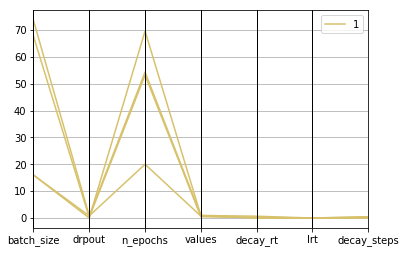

In [44]:
import pandas as pd
data = pd.read_csv('parameters.csv')
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(data,'test')
plt.show()